In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from lab_lib import *

In [63]:
h_plank = 6.626 * 1e-34
q_elec  = 1.6 * 1e-19
m_elec  = 9.11 * 1e-31

In [100]:
"""
II. 5
"""

U_nakala  = [(3.07,0.01), (2.88, 0.03)]

# 2V/del
V_max_    = [(1.5, 0.2), (1.2, 0.2)]
V_min_    = [(3.8, 0.6), (3.8, 1)]
V_proboy_ = [(5.8, 0.2), (5.8, 0.2)]

V_max = [tuple(j * 2 for j in i) for i in V_max_]
V_min = [tuple(j * 2 for j in i) for i in V_min_]
V_proboy = [tuple(j * 2 for j in i) for i in V_proboy_]

dyn_meas_table = [[r"$U_{накала}, В$", r"$V_{max}, В$", r"$V_{min}, В$", r"$V_{пробоя}, В$"]]
for i in range(2):
    dyn_meas_table.append([texAns(U_nakala[i]), texAns(V_max[i]), texAns(V_min[i]), texAns(V_proboy[i])])

texTable(dyn_meas_table)

"""
III. 4
"""

raw_data = [pd.read_csv("data/static_3.07.csv").to_numpy(), pd.read_csv("data/static_2.88.csv").to_numpy()]


V_cathode = [[j[0]        for j in i] for i in raw_data]
V_anode   = [[j[1]        for j in i] for i in raw_data]
R = (100 * 1e3, 5 * 1e3)



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|}
        \hline

        $U_{накала}, В$ & $V_{max}, В$ & $V_{min}, В$ & $V_{пробоя}, В$\\ \hline
        $3.070 \pm 0.010$ & $3.0 \pm 0.4$ & $8 \pm 1$ & $11.6 \pm 0.4$\\ \hline
        $2.88 \pm 0.03$ & $2.4 \pm 0.4$ & $8 \pm 2$ & $11.6 \pm 0.4$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



In [81]:
"""
IV. 1-3
"""

def count_l(V_max, V_min):
    E1 = countWithSigma(V_max[0] * q_elec, [V_max])
    E2 = countWithSigma(V_min[0] * q_elec, [V_min])

    l = countWithSigma(h_plank * np.sqrt(5) / np.sqrt(32 * m_elec * (E2[0] - E1[0])), [((E2[0]-E1[0]), -1/2*np.sqrt(E1[1]**2 + E2[1]**2))])

    return l

def count_U0(V_max, V_min):
    E1 = countWithSigma(V_max[0] * q_elec, [V_max])
    E2 = countWithSigma(V_min[0] * q_elec, [V_min])

    U0 = (4/5*E2[0] - 9/5*E1[0], np.sqrt((4/5*E2[1])**2 + (9/5*E1[1])**2))

    return U0

table_dynamic = [[r"$U_{нак}, В$", r"$l, \AA$", r"$U_0, эВ$", "$U_{проб}, эВ$"]]
for i in range(2):
    table_dynamic.append([texAns(U_nakala[i]), texAns(tuple(j*1e10 for j in count_l(V_max[i], V_min[i]))), texAns(tuple(j/q_elec for j in count_U0(V_max[i], V_min[i]))), texAns(tuple(j for j in V_proboy[i]))])

texTable(table_dynamic)



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|}
        \hline

        $U_{нак}, В$ & $l, \AA$ & $U_0, эВ$ & $U_{проб}, эВ$\\ \hline
        $3.070 \pm 0.010$ & $3.2 \pm 0.4$ & $1 \pm 1$ & $11.6 \pm 0.4$\\ \hline
        $2.88 \pm 0.03$ & $3.0 \pm 0.6$ & $2 \pm 2$ & $11.6 \pm 0.4$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



x_peaks =  [np.float64(2.597897897897898), np.float64(2.5508908908908907)]
$x_max = $ $2.57 \pm 0.05$
29 42
x_peaks =  [np.float64(6.975925925925926), np.float64(6.988378378378378)]
$x_min = $ $6.982 \pm 0.012$


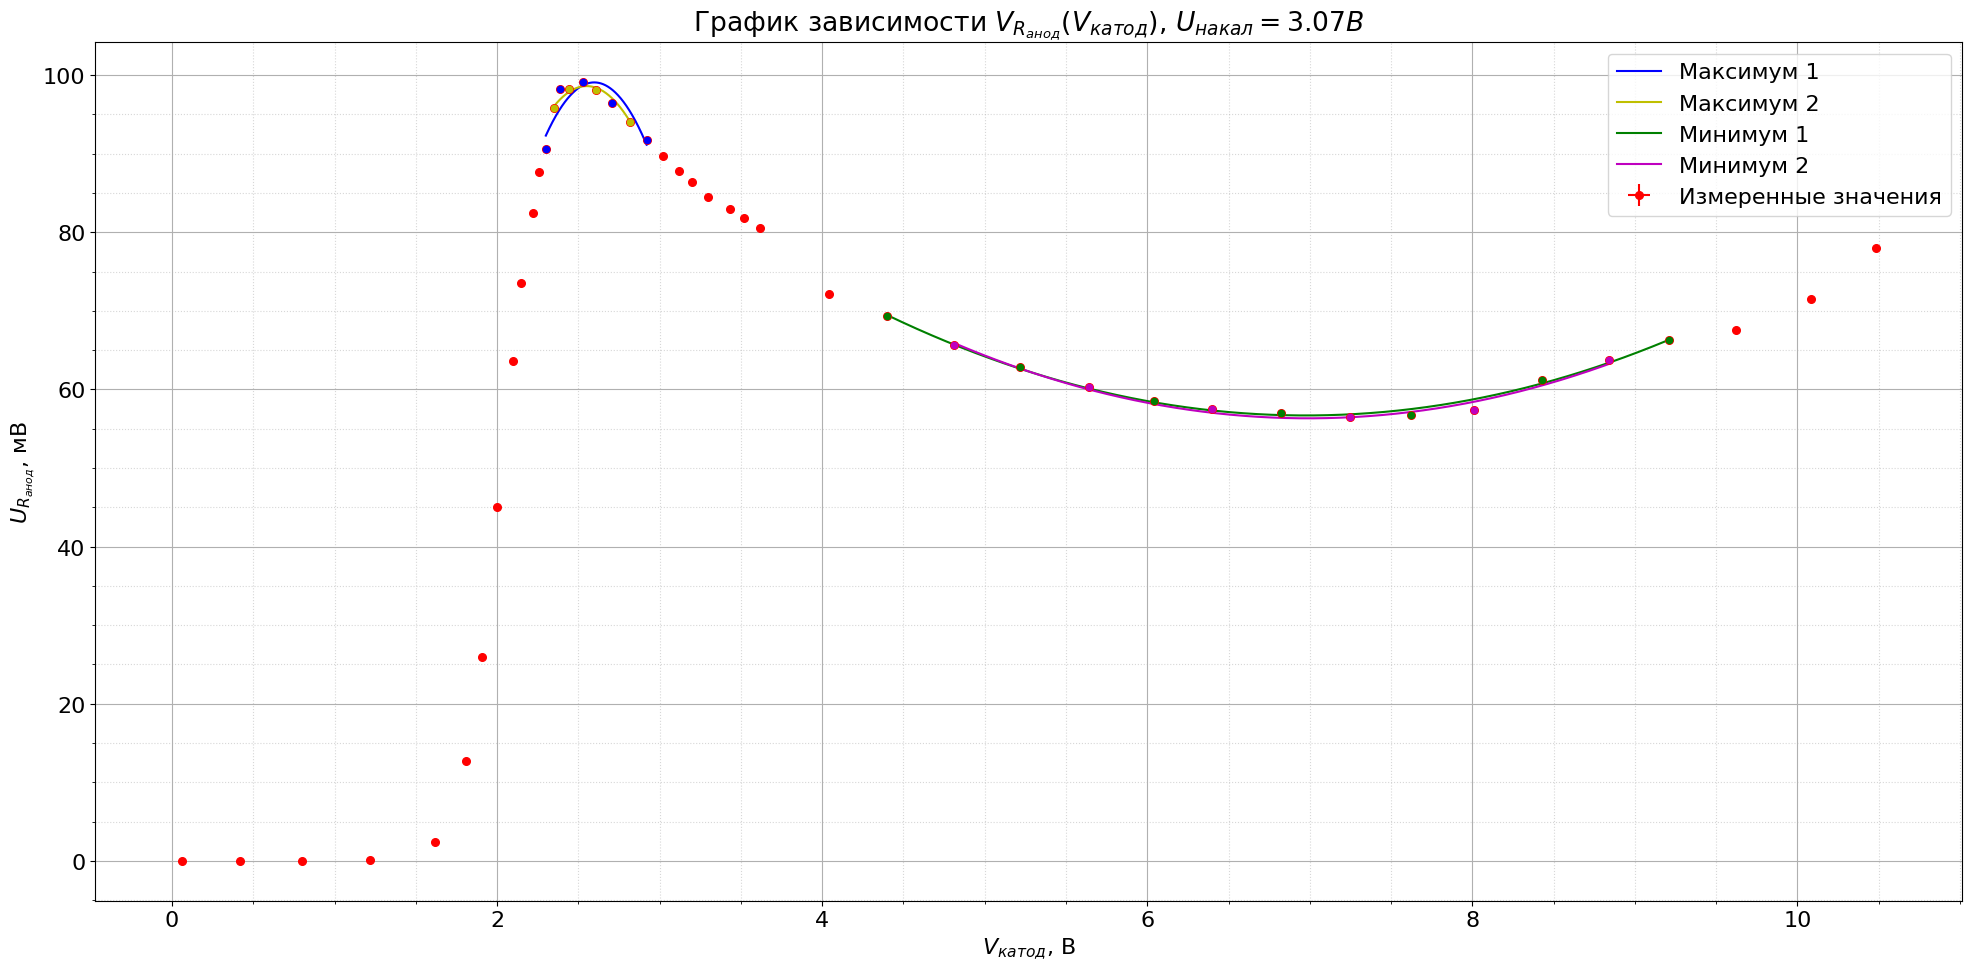

x_peaks =  [np.float64(2.460750750750751), np.float64(2.446176176176176)]
$x_max = $ $2.45 \pm 0.01$
31 43
x_peaks =  [np.float64(7.044234234234234), np.float64(7.07945945945946)]
$x_min = $ $7.06 \pm 0.04$


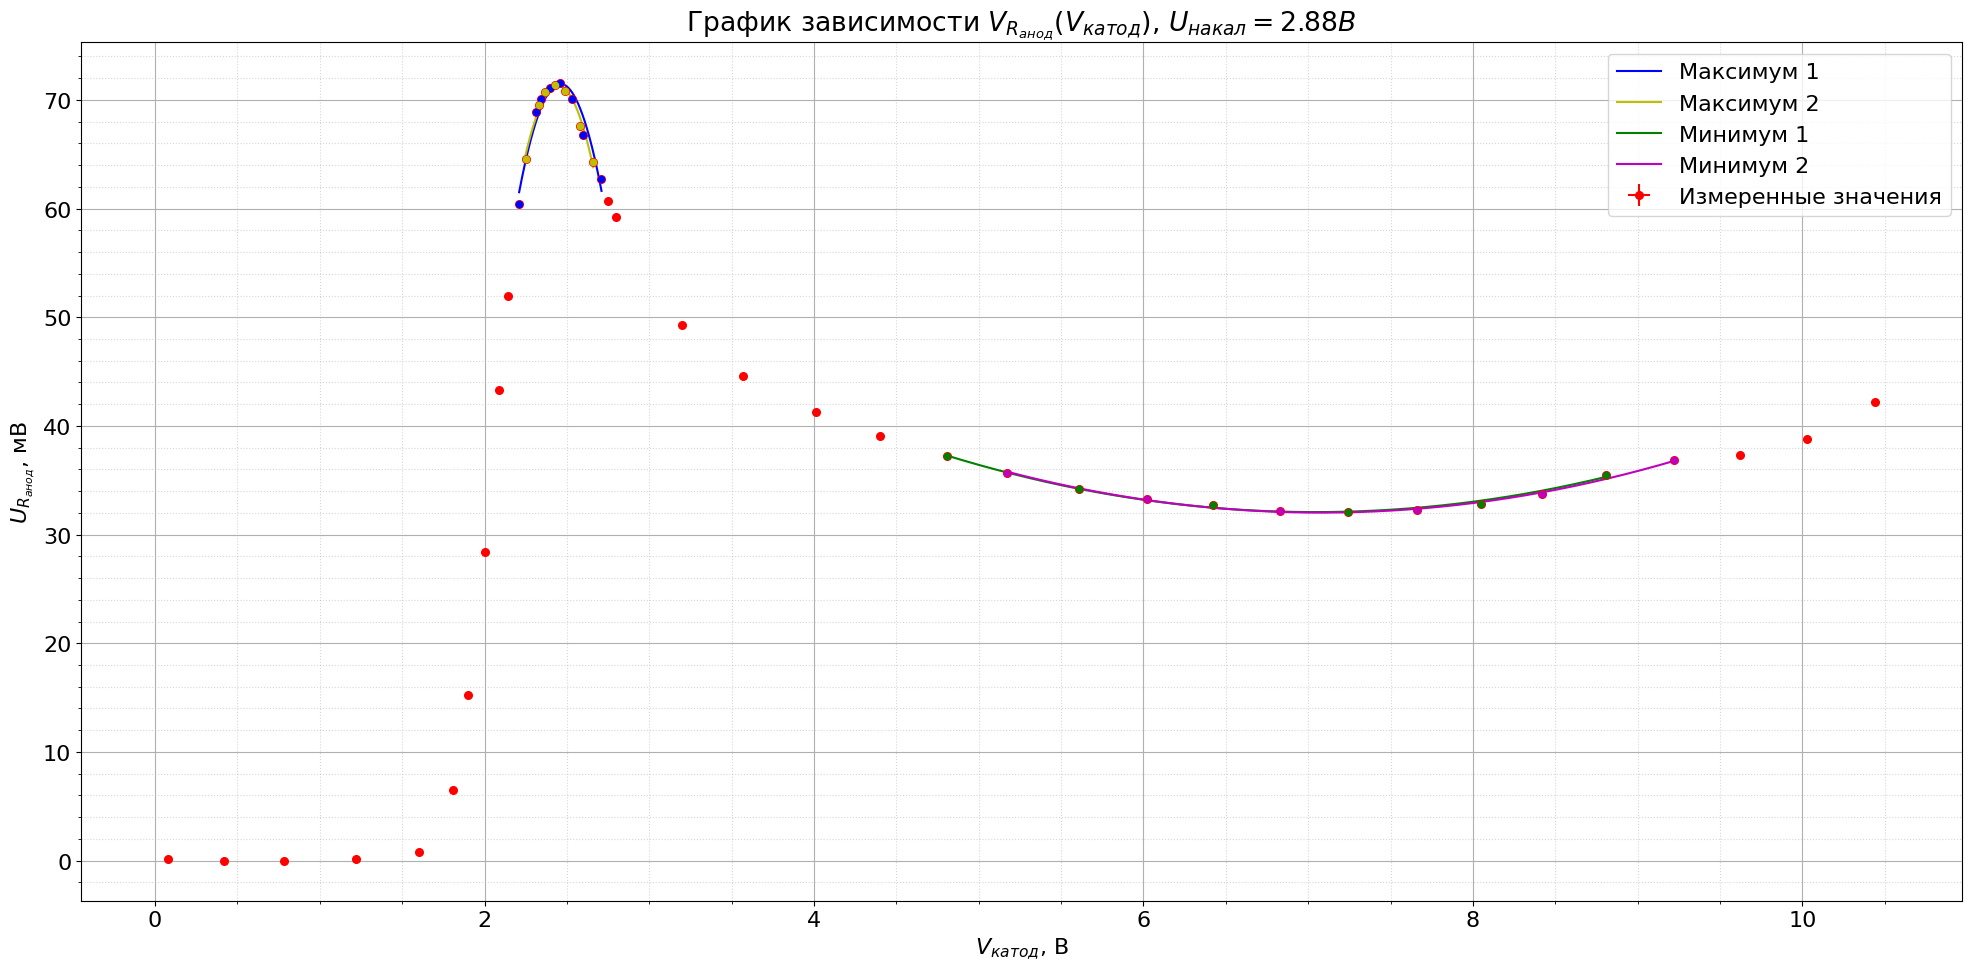



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        $U_{накала}, В$ & $V_{max}, В$ & $V_{min}, В$\\ \hline
        $3.070 \pm 0.010$ & $2.57 \pm 0.05$ & $6.982 \pm 0.012$\\ \hline
        $2.88 \pm 0.03$ & $2.45 \pm 0.01$ & $7.06 \pm 0.04$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        $U_{нак}, В$ & $l, \AA$ & $U_0, эВ$\\ \hline
        $3.070 \pm 0.010$ & $3.27 \pm 0.02$ & $0.95 \pm 0.09$\\ \hline
        $2.88 \pm 0.03$ & $3.20 \pm 0.01$ & $1.23 \pm 0.04$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



In [101]:
"""
IV. 4
"""

def find_range_by_lvl(arr, lvl, greater=True):
    min_index = None
    for i in range(0, len(arr)):
        if greater and arr[i] >= lvl or not greater and arr[i] <= lvl:
            min_index = i
            break

    for i in range(min_index, len(arr)):
        if greater and arr[i] < lvl or not greater and arr[i] > lvl:
            max_index = i - 1
            return min_index, max_index

    raise ValueError()


def make_two_parabolas(func, x_sel, y_sel, colors, argmax=True):
    x_sel = [[x_sel[i] for i in range(0, len(x_sel), 2)], [x_sel[i] for i in range(1, len(x_sel), 2)]]
    y_sel = [[y_sel[i] for i in range(0, len(y_sel), 2)], [y_sel[i] for i in range(1, len(y_sel), 2)]]

    x_peaks = [0, 0]
    y_maxs  = [0, 0]

    for i in range(2):
        x = x_sel[i]
        y = y_sel[i]

        popt, pcov = curve_fit(func, x, y, p0 = (0.0, 0.0, 0.0))
        a = popt[0]
        b = popt[1]
        c = popt[2]

        x_lin = np.linspace(x[0], x[-1], 1000)
        plt.plot(x_lin, func(x_lin, a, b, c), colors[i], label = ("Максимум " if argmax else "Минимум ") + str(i + 1))

        x_peaks[i] = x_lin[np.argmax(func(x_lin, a, b, c)) if argmax else np.argmin(func(x_lin, a, b, c))]

        y_maxs[i] = max(func(x_lin, a, b, c))

        plt.errorbar(x, y, yerr = 0, xerr = 0, fmt =  colors[i] + '.', markersize = 9)

    print("x_peaks = ", x_peaks)
    return (np.mean(x_peaks), abs(x_peaks[0] - x_peaks[1])), meanWithInacc([(y_maxs[0], 0.1), (y_maxs[1], 0.1)])


def make_static(x, y, max_lvl, min_lvl, U_nakala):
    def func(x, a, b, c):
        return a * x**2 + b * x + c

    x_err = [0.01] * len(x)
    y_err = [0.1] * len(y)

    mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
    plt.figure(figsize = (20,10), facecolor = "white") # Создаем фигуру

    # Подписываем оси и график
    plt.title(r"График зависимости $V_{R_{анод}}(V_{катод})$, $U_{накал} = " + U_nakala + " В$")
    plt.ylabel(r"$U_{R_{анод}}$, мВ")
    plt.xlabel(r"$V_{катод}$, В")

    plt.errorbar(x, y, yerr = y_err, xerr = x_err, fmt = 'r.', markersize = 11, markerfacecolor = 'r', label = 'Измеренные значения')

    min_index, max_index = find_range_by_lvl(y, max_lvl)

    x_sel = x[min_index:max_index]
    y_sel = y[min_index:max_index]

    x_max, y_max = make_two_parabolas(func, x_sel, y_sel, ["b", "y"])
    print("$x_max = $", texAns(x_max))

    max_index, min_index = find_range_by_lvl(list(reversed(y)), min_lvl, False)
    min_index = len(y) - min_index - 1
    max_index = len(y) - max_index - 1
    print(min_index, max_index)
    x_sel = x[min_index:max_index]
    y_sel = y[min_index:max_index]

    x_min, _ = make_two_parabolas(func, x_sel, y_sel, ["g", "m"], False)
    print("$x_min = $", texAns(x_min))

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1)   # Активируем сетку
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend() # Активируем легенду графика
    plt.savefig("img/plot_static_{}.png".format(U_nakala))
    plt.show()

    return x_max, x_min, y_max

x_max = [0, 0]
x_min = [0, 0]
y_max = [0, 0]

x_max[0], x_min[0], y_max[0] = make_static(V_cathode[0], V_anode[0], 88, 70, "3.07")
x_max[1], x_min[1], y_max[1] = make_static(V_cathode[1], V_anode[1], 60, 38, "2.88")

table_meas_static = [[r"$U_{накала}, В$", r"$V_{max}, В$", r"$V_{min}, В$"]]
for i in range(2):
    table_meas_static.append([texAns(U_nakala[i]), texAns(x_max[i]), texAns(x_min[i])])

texTable(table_meas_static)

table_static = [[r"$U_{нак}, В$", r"$l, \AA$", r"$U_0, эВ$"]]
for i in range(2):
    table_static.append([texAns(U_nakala[i]), texAns(tuple(j*1e10 for j in count_l(x_max[i], x_min[i]))), texAns(tuple(j/q_elec for j in count_U0(x_max[i], x_min[i])))])

texTable(table_static)

In [84]:
"""
IV. 5
"""

def get_En(U0, n, l):
    En_plus_U0 = countWithSigma(h_plank**2 * n**2 / (8 * m_elec * l[0]**2), [(l[0], l[1]*2)])
    return ((En_plus_U0[0] - U0[0]) / q_elec, np.sqrt(En_plus_U0[1]**2 + U0[1]**2) / q_elec)

U0_mean = meanWithInacc([count_U0(x_max[i], x_min[i]) for i in range(2)])
l_mean  = meanWithInacc([count_l(x_max[i], x_min[i]) for i in range(2)])

print(r"$<U_0> = $", texAns(tuple(i / q_elec for i in U0_mean)))
print(r"$<l> = $", texAns(l_mean))

print(r"$E_2 = $", texAns(get_En(U0_mean, 2, l_mean)))
print(r"$E_3 = $", texAns(get_En(U0_mean, 3, l_mean)))

$<U_0> = $ $1.1 \pm 0.2$
$<l> = $ $0.000000000323 \pm 0.000000000004$
$E_2 = $ $13.3 \pm 0.4$
$E_3 = $ $31.4 \pm 0.8$


$I_0 = $ $0.00099 \pm 0.00005$


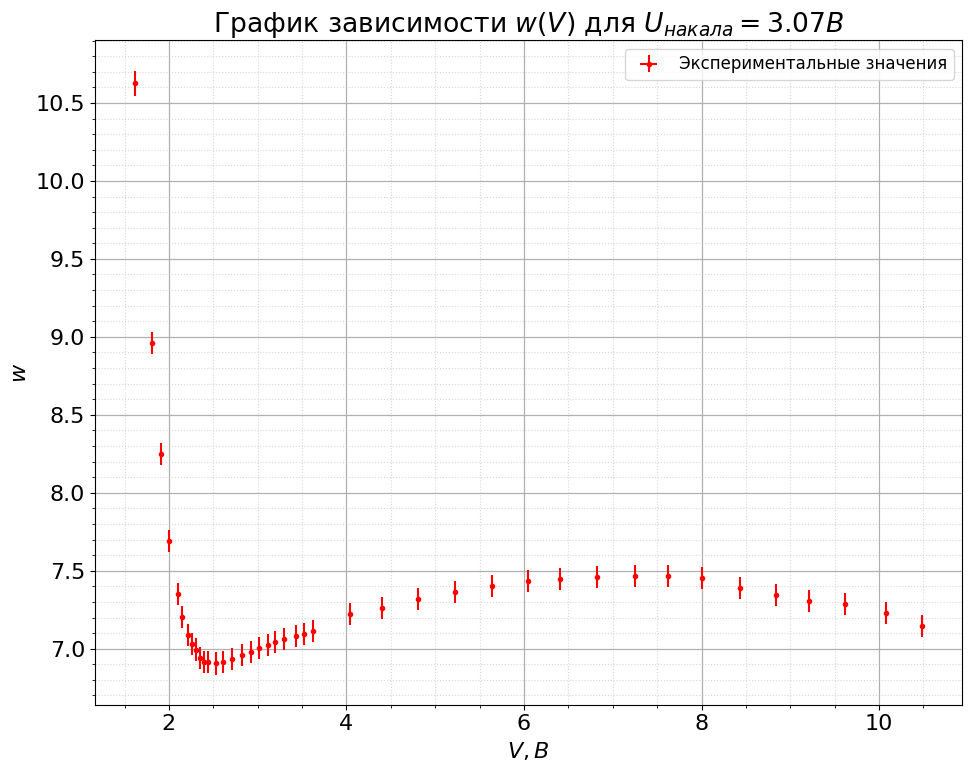

$I_0 = $ $0.00071 \pm 0.00004$


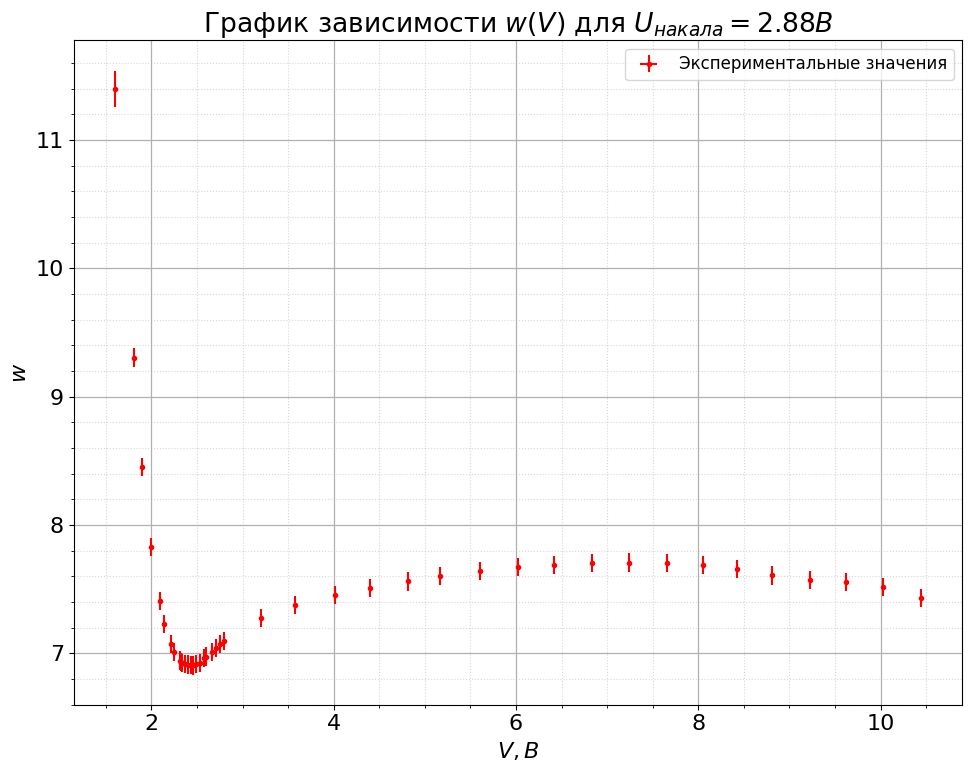

In [96]:
"""
IV. 6
"""

def get_I(U):
    return countWithSigma(U[0] / R[0], [U, R])


for i in range(2):
    I0 = get_I(y_max[i])
    print(r"$I_0 = $", texAns(I0))
    x = V_cathode[i][4:]
    dx = [0.01]*len(V_cathode[i][4:])
    y = [get_I((j*1e-3, 0.1*1e-3)) for j in V_anode[i][4:]]
    y = [(-np.log(j[0] / I0[0]), np.sqrt((1/j[0] * j[1])**2 + (1/I0[0] * I0[1])**2)) for j in y]

    dy = [j[1] for j in y]
    y  = [j[0] for j in y]

    mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
    plt.figure(figsize = (10,8), facecolor = "white") # Создаем фигуру

    # Подписываем оси и график
    plt.title(r"График зависимости $w(V)$ для $U_{накала} = " + str(U_nakala[i][0]) + " В $")
    plt.ylabel(r"$w$")
    plt.xlabel(r"$V, В$")

    #plt.errorbar(x, y, "or", markersize = 9, label = 'Экспериментальные значения')
    plt.errorbar(x, y, xerr = dx, yerr = dy, fmt='.r', label = 'Экспериментальные значения')
    #plt.plot(x, y, "+b", label = "Экспериментальные данные", linewidth = 1)

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

    plt.savefig(f"img/plot_probability_{str(U_nakala[i][0])}.png")
    plt.show()

In [99]:
"""
Appendix
"""

def make_meas_table(V_cathode, V_anode):
    table = [[r"$V_{катод}, В$", r"$V_{анод}, мВ$"]]
    for i in range(len(V_cathode)):
        table.append(["$%.2f$" % V_cathode[i], "$%.1f$" % V_anode[i]])

    texTable(table)

for i in range(2):
    make_meas_table(V_cathode[i], V_anode[i])



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|}
        \hline

        $V_{катод}, В$ & $V_{анод}, мВ$\\ \hline
        $0.06$ & $0.0$\\ \hline
        $0.42$ & $0.0$\\ \hline
        $0.80$ & $0.0$\\ \hline
        $1.22$ & $0.1$\\ \hline
        $1.62$ & $2.4$\\ \hline
        $1.81$ & $12.7$\\ \hline
        $1.91$ & $25.9$\\ \hline
        $2.00$ & $45.1$\\ \hline
        $2.10$ & $63.6$\\ \hline
        $2.15$ & $73.5$\\ \hline
        $2.22$ & $82.5$\\ \hline
        $2.26$ & $87.7$\\ \hline
        $2.30$ & $90.6$\\ \hline
        $2.35$ & $95.8$\\ \hline
        $2.39$ & $98.2$\\ \hline
        $2.44$ & $98.3$\\ \hline
        $2.53$ & $99.1$\\ \hline
        $2.61$ & $98.1$\\ \hline
        $2.71$ & $96.4$\\ \hline
        $2.82$ & $94.1$\\ \hline
        $2.92$ & $91.8$\\ \hline
        $3.02$ & $89.7$\\ \hline
        $3.12$ & $87.8$\\ \hline
        $3.20$ & $86.4$\\ \hline
        $3.30$ & $84.5$\\ \hline
        $3.43$ & $83.0$\\ \hline
        $3.52$ & $8